<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/EvaluationPerformanceMetrics_SocialNetworkAdv_PIMADiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 5: Evaluation Performance Metrics

## Learning Objectives

At the end of the experiment, you will be able to:

* learn about Classification tasks in Machine learning

* learn the appropriate performance metrics according to use case

### Classification

**Classification** refers to a predictive modeling problem where a class label is predicted for a given example of input data.

**Examples include:**

* Email spam detection (spam or not).
* Churn prediction (churn or not).
* Conversion prediction (buy or not).

**Binary classification** refers to those classification tasks that have two class labels.

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). 

### Implementing Binary Classification with Logistic Regression 

#### Dataset

In this example, we will be using "Social_Network_Ads" dataset. 

The variable descriptions are as follows:

* Age
* EstimatedSalary

The target feature is:
* Purchased

Problem Statement: To predict if a person will purchase an item based on age and estimated salary. 

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M2_Assignment_05_Evaluation_PerformanceMetrics_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.extras.talentsprint.com/CDS/Datasets/Social_Network_Ads.csv")
    ipython.magic("sx wget https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/diabetes.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/adsmi/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")


Please complete Id and Password cells before running setup


### Importing required packages


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve

#### Load the Dataset

In [ ]:
# Loading the social network dataset.
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 3].values # estimated salary
y = df.iloc[:, -1].values
X = X.reshape(-1, 1)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [ ]:
print(X_test)

In [ ]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


#### Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

#### Training the Logistic Regression model on the Training set




In [ ]:
# Initializing the Logistic Regression classifier
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Predicting a new test instance

In [ ]:
print(classifier.predict(sc.transform([[87000]])))

[0]


#### Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Model Evaluation 

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score
* ROC curve
* AUROC

#### Confusion Matrix

* **Confusion matrix:**  is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. 

  * **true positive** for correctly predicted event values.
  * **false positive** for incorrectly predicted event values.
  * **true negative** for correctly predicted no-event values.
  * **false negative** for incorrectly predicted no-event values.
* **Accuracy:** it is the ratio of the number of correct predictions to the total number of input samples.


In [ ]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[66  2]
 [17 15]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.87        68
           1       0.88      0.47      0.61        32

    accuracy                           0.81       100
   macro avg       0.84      0.72      0.74       100
weighted avg       0.82      0.81      0.79       100



This Confusion Matrix tells us that there were 81 correct predictions and 19 incorrect ones.

* True Positive: 66
* True Negative: 15
* False Positive: 2
* False Negative: 17

#### Precision-Recall Metrics

* **Precision:** summarizes the fraction of examples assigned the positive class that belongs to the positive class.

    Precision = $\mathbf{\frac{TruePositive}{TruePositive + FalsePositive}}$

* **Recall:** summarizes how well the positive class was predicted and is the same calculation as sensitivity.

   Recall = $\mathbf{\frac{TruePositive}{TruePositive + FalseNegative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $\mathbf{\frac{2*Precision*Recall}{Precision+Recall}}$

##### Plotting precision-recall curve using sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


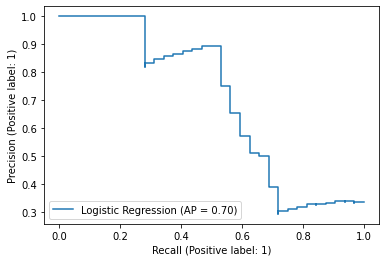

In [ ]:
# Use sklearn to plot precision-recall curves
plot_precision_recall_curve(classifier, X_test, y_test, name = 'Logistic Regression')

The above diagram shows the blue line as precision-recall curve.

### ROC-AUC curve

A ROC curve is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.

Area Under Curve (AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problems.

AUC has a range of [0, 1]. The greater the value, the better is the performance of our model.

#### Plotting the ROC-AUC curve for Logistic Regression algorithm using matplotlib

In [ ]:
# roc_curve() computes the ROC for the classifier and returns the FPR, TPR, and threshold values
classifier.fit(X_train, y_train)
pred_prob1 = classifier.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


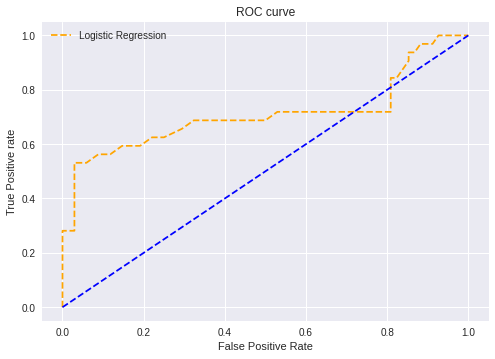

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The above diagram shows:

ROC curve: is the orange dotted line

AUROC: is the area under the orange dotted line

The blue dotted line is the reference line.

Please refer to the given [link](https://heartbeat.fritz.ai/evaluation-metrics-for-machine-learning-models-d42138496366) for further information on Performance metrics

### Example: Predicting Diabetes with Logistic Regression

Let us now apply the above learnings to perform a logistic regression using a 'UCI PIMA Indian Diabetes' dataset.

 * Fit the model
 * Do the prediction
 * Plot the ROC-AUC curve for the Logistic Regression algorithm



#### Dataset

In this example, we will be using the "UCI PIMA Indian Diabetes" dataset.

The datasets consist of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

The variable descriptions are as follows:

* Pregnancies: Number of Pregnancies
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* Blood pressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

Problem statement:

We will be using this dataset to predict if a person has diabetes or not using the medical attributes provided.

#### Importing all the required packages

In [ ]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve

#### Importing the dataset

In [ ]:
DF = pd.read_csv('/content/diabetes.csv')
print(DF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### Finding if there are any null values

In [ ]:
# YOUR CODE HERE
DF.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Training our model

In [ ]:
# Separating the data into independent and dependent variables

# YOUR CODE HERE
y = DF.iloc[:,-1].values
DF = DF.drop(['Outcome'], axis = 1)
X = DF.iloc[:,:].values

#### Splitting the data into training and testing data

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Training the Logistic Regression model on the Training set

In [ ]:
# YOUR CODE HERE
classifier = LogisticRegression(random_state = 0)

#### Training/Fitting the Model

In [ ]:
# YOUR CODE HERE
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Making Predictions

In [ ]:
# YOUR CODE HERE
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#### Confusion Matrix

In [ ]:
# YOUR CODE HERE
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[118  12]
 [ 26  36]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



#### Plotting the ROC curve for Logistic Regression algorithm using matplotlib

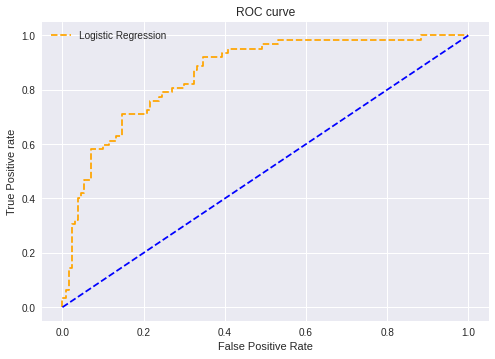

In [ ]:
# YOUR CODE HERE
# roc_curve() computes the ROC for the classifier and returns the FPR, TPR, and threshold values
classifier.fit(X_train, y_train)
pred_prob1 = classifier.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Please answer the questions below to complete the experiment:




In [ ]:
#@title The ROC curve is monotonically increasing ? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["", "FALSE", "TRUE"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]

In [ ]:
 #@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [ ]:
 #@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
